In [1]:
import imp
import sympy
import numpy as np
sympy.init_printing()
x = sympy.symbols('x', real=True)
u = sympy.symbols('u', cls=sympy.Function)
f = x * x + u(x) * u(x)
xi = sympy.Integer(0)
eta = sympy.Integer(0)

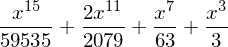

In [2]:
import picard
picard = imp.reload(picard)
picard.solve(f, xi, eta, n_iterations=3)

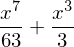

In [3]:
import taylor_series
taylor_series = imp.reload(taylor_series)
taylor_series.solve(f, xi, eta, n_iterations=7)

In [4]:
import euler
euler = imp.reload(euler)
euler.explicit_solve(lambda x, y: x * x + y * y, 0.0, 1.0, 0.0, n=5)

array([ 0.        ,  0.        ,  0.015625  ,  0.07818604,  0.2203393 ])

In [5]:
import runge_kutta
runge_kutta = imp.reload(runge_kutta)
runge_kutta.solve_4(lambda x, y: x * x + y * y, 0.0, 1.0, 0.0, n=6)

array([ 0.        ,  0.00266687,  0.02136009,  0.0724512 ,  0.17409018,
        0.35025755])

In [6]:
(x + u(x)).evalf(100, subs={x: 4, u(x): sympy.pi})

In [7]:
f = sympy.lambdify(x, (x*u(x)).subs([(u(x), sympy.pi)]), 'numpy')
a = np.arange(10)
f(a)

array([  0.        ,   3.14159265,   6.28318531,   9.42477796,
        12.56637061,  15.70796327,  18.84955592,  21.99114858,
        25.13274123,  28.27433388])

In [14]:
l = sympy.symbols('lambda')
expr = 4 * l ** 4 + 4 * l ** 3 + 37 * l ** 2 + 36 * l + 9
expr.factor()

In [17]:
expr = 2 * l ** 3 + 9 * l ** 2 + 12 * l + 5
expr.factor()

In [20]:
psi, phi, xi, a, t = sympy.symbols('psi phi xi a t')
x y = sympy.symbols('x y')
phi = sympy.symbols('phi', cls=sympy.Function)
exp = sympy.intergrate()

SyntaxError: invalid syntax (<ipython-input-20-697c12a8bb0a>, line 2)

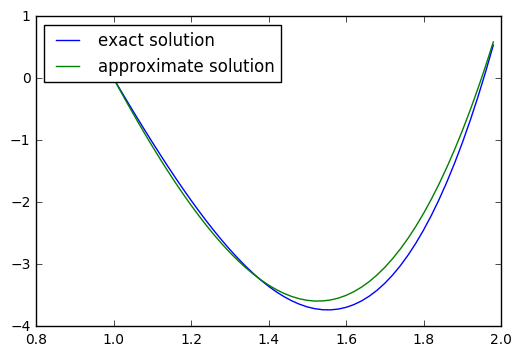

In [16]:
import sympy
import imp
import ritz2
import scipy.linalg as sla
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ritz2 = imp.reload(ritz2)
s = 15
x = sympy.symbols('x', real=True)
p = 1
q = 1 / x
f = s * x * x
phi = [x - 1, (x - 1) * (2 - x), (x - 1) * (x - 1) * (2 - x)]
a = 1
b = 2
Am, Bm = ritz2.solve(p, q, f, phi, a, b)
sol = sla.solve(Am, -Bm)
t1 = np.arange(a, b, 0.02)
plt.plot(t1, (t1 ** 2 - 1) * (3 * s * (t1 ** 2 - 4) + 8) / 24.0, label="exact solution")
plt.plot(t1, t1 - 1 + sol[0] * (t1 - 1) * (2 - t1) + sol[1] * (2 - t1) * (t1 - 1) ** 2, label="approximate solution")
plt.legend(loc=2)

In [39]:
A = sympy.Matrix(tmp[0])
B = sympy.Matrix(tmp[1])
a1, a2 = sympy.symbols('a1 a2')
sympy.linsolve((A, B), [a1, a2])

{(1.0, 1.0)}

In [40]:
A

Matrix([
[4.34285714285714, 2.23928571428571],
[2.23928571428571, 4.20396825396825]])

In [41]:
B

Matrix([
[6.58214285714286],
[6.44325396825397]])

In [68]:
import numpy as np
n = 2
c = sympy.Matrix(np.zeros((n, n)))
x = sympy.symbols('x', real=True)
phi = [2 * x + 8, x * x - 3, x ** 3 - 4]
p = x / 2
q = -1
f = x - 5
for k in range(1, n + 1):
    for i in range(1, n + 1):
        print(k, i, (phi[k].diff(x).diff(x) + p * phi[k].diff(x) - q * phi[k]) * phi[i])
        c[k-1,i-1] = sympy.integrate((phi[k].diff(x).diff(x) + p * phi[k].diff(x) - q * phi[k]) * phi[i], (x, 0, 1))
d = sympy.Matrix(np.zeros((n, 1)))
for i in range(1, n + 1):
    print(i, (f - phi[0].diff(x).diff(x) - p * phi[0].diff(x) + q * phi[0]) * phi[i])
    d[i - 1] = sympy.integrate((f - phi[0].diff(x).diff(x) - p * phi[0].diff(x) + q * phi[0]) * phi[i], (x, 0, 1))

1 1 (x**2 - 3)*(2*x**2 - 1)
1 2 (2*x**2 - 1)*(x**3 - 4)
2 1 (x**2 - 3)*(5*x**3/2 + 6*x - 4)
2 2 (x**3 - 4)*(5*x**3/2 + 6*x - 4)
1 (-2*x - 13)*(x**2 - 3)
2 (-2*x - 13)*(x**3 - 4)


In [67]:
d

Matrix([
[  223/6],
[1047/20]])

In [72]:
sympy.linsolve((c, d), [a1, a2])

{(-115650/11383, 385714/11383)}

In [76]:
t1, t2 = -115650/11383, 385714/11383

In [77]:
(t1 * 16 / 15 + t2 * 17 / 12) * 6

223.00000000000003

In [81]:
import numpy as np
n = 2
c = sympy.Matrix(np.zeros((n, n)))
x = sympy.symbols('x', real=True)
phi = [x, x * (x - 1), x * x * (x - 1)]
p = sympy.Integer(1)
q = 5 * x
f = 2 * x + 1
for k in range(1, n + 1):
    for i in range(1, n + 1):
        print(k, i, p * phi[k].diff(x) * phi[i].diff(x) + q * phi[k] * phi[i])
        c[k-1,i-1] = sympy.integrate(p * phi[k].diff(x) * phi[i].diff(x) + q * phi[k] * phi[i], (x, 0, 1))
d = sympy.Matrix(np.zeros((n, 1)))
for i in range(1, n + 1):
    print(i, (f - phi[0].diff(x).diff(x) - p * phi[0].diff(x) + q * phi[0]) * phi[i])
    d[i - 1] = sympy.integrate(p * phi[0].diff(x) * phi[i].diff(x) + q * phi[0] * phi[i] + f, (x, 0, 1))

1 1 5*x**3*(x - 1)**2 + (2*x - 1)**2
1 2 5*x**4*(x - 1)**2 + (2*x - 1)*(x**2 + 2*x*(x - 1))
2 1 5*x**4*(x - 1)**2 + (2*x - 1)*(x**2 + 2*x*(x - 1))
2 2 5*x**5*(x - 1)**2 + (x**2 + 2*x*(x - 1))**2
1 x*(x - 1)*(5*x**2 + 2*x)
2 x**2*(x - 1)*(5*x**2 + 2*x)


In [84]:
sympy.linsolve((d, c), (a1, a2))

{(311/5488, 1083/3920)}

In [85]:
311/5488, 1083/3920

(0.056669096209912534, 0.27627551020408164)